# North Macedonian 2024 Election Sentiment Analysis
---
This notebook performs sentiment analysis on the Social Media posts during the 2024 North Macedonian Elections.

##### Libraries

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

In [4]:
text = """Himni dhe simbolet shtetërore kanë vendin dhe kohën e vet se ku përdoren dhe nuk duhet të shërbejnë për t’i bërë karshillëk askujt. 
Propozimi i kreut të VMRO-DPMNE Hristijan Mickoski që të obligon fëmijët çdo të hënë të këndojnë himnin shtetëror pasqyron mendësinë nacionaliste të VMRO-DPMNE për të ushqyer fëmijët me nacionalizëm dhe me këtë të motivohet politika e tyre drejt izolim shoqëror dhe shtetëror. 
Kam një propozim më kreativ se çka duhet të dëgjojnë fëmijët në këtë shtet dhe atë jo çdo të hënë por çdo ditë:
- të dëgjojnë se si VMRO-DPMNE shet nacionalizëm të rrejshëm ndërsa bën argatin e agjendave anti-evropiane!
- se si VMRO-DPMNE nxit urrejtje dhe ndasi!
-se si VMRO-DPMNE po bllokon të ardhmen evropiane të gjeneratave të reja!
-se si VMRO-DPMNE po izolon shtetin!
- se si VMRO-DPMNE ushtron pushtetin kundër kombit shqiptar në komunat që udhëheqin kuadrot e saj!
Me qasje të këtij lloji, shteti rrezikon shumë prandaj është i nevojshëm një bllok më i madh me orientim të qartë për të ardhmen evropiane të vendit."""

In [ ]:
nest_asyncio.apply()  # Not needed here but safe in Jupyter

# Create a translator instance
translator = Translator()


# Translate the text (synchronous call)
text_translated = translator.translate(text, src='auto', dest='en')

# Print the translated text
print(text_translated.text)

# Store it if needed
# translated_text = text_translated.text


<coroutine object Translator.translate at 0x00000197B222F850>


In [14]:
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(translated_text)
print("Sentiment Analysis Results:")
print(f"Negative: {sentiment['neg']}")
print(f"Neutral: {sentiment['neu']}")
print(f"Positive: {sentiment['pos']}")
print(f"Compound: {sentiment['compound']}")

Sentiment Analysis Results:
Negative: 0.0
Neutral: 1.0
Positive: 0.0
Compound: 0.0


/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_68295/2520009118.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


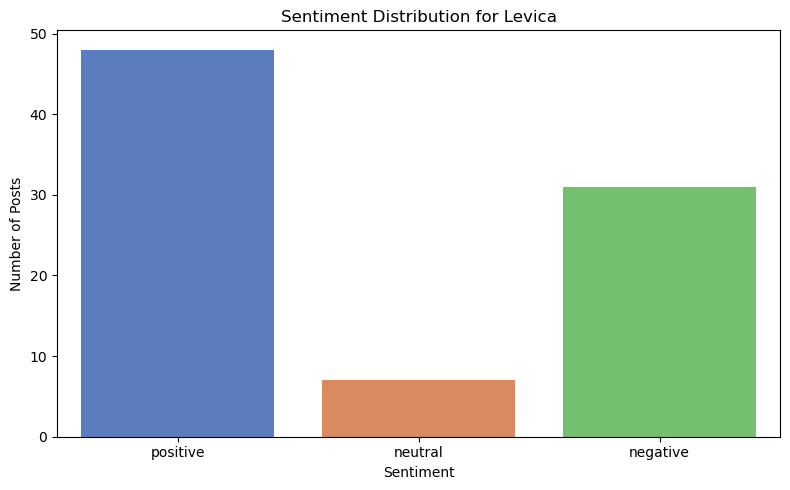

In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns

nest_asyncio.apply()

# Load Levica ad data
df = pd.read_csv("Dataset/Levica_ad_creative_bodies.csv")
df = df.dropna(subset=["ad_creative_bodies"])  # Remove empty entries

# Set up translation and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Translate and analyze each row
translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # fallback if translation fails
    
    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]
    
    # Assign label
    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"
    
    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add new columns
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for Levica")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


/var/folders/cj/41mhghc57qs23fd8t0938swm0000gn/T/ipykernel_68295/1461401803.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')


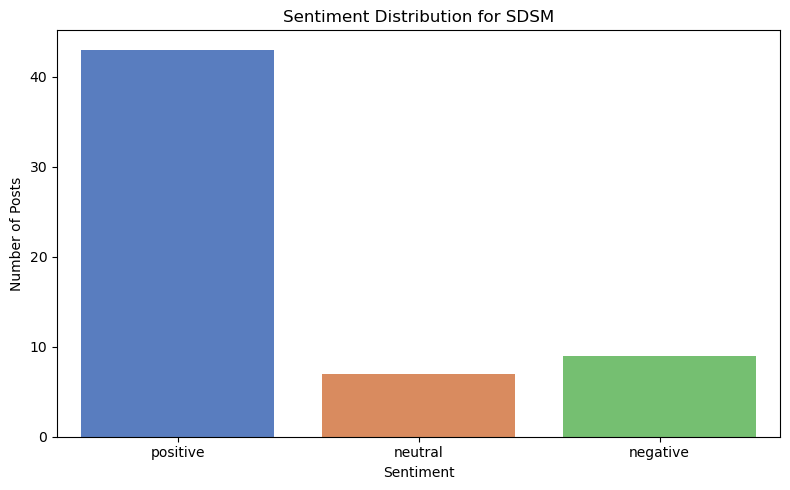

In [10]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns

# Allow nested event loops in Jupyter
nest_asyncio.apply()

# Load SDSM dataset
df = pd.read_csv("Dataset/SDSM_ad_creative_bodies.csv")
df = df.dropna(subset=["ad_creative_bodies"])

# Initialize translator and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Translate and analyze
translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # Fallback to original

    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]
    
    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

# Add results to DataFrame
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels

# Save results (optional)
df.to_csv("Dataset/SDSM_sentiment.csv", index=False)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='muted')
plt.title("Sentiment Distribution for SDSM")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

nest_asyncio.apply()

# Load the dataset
df = pd.read_csv("Dataset/SDSM_ad_creative_bodies.csv")
df = df.dropna(subset=["ad_creative_bodies"])

# Set up translator and analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

translated_texts = []
compound_scores = []
sentiment_labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text  # fallback if translation fails

    sentiment = analyzer.polarity_scores(translated)
    compound = sentiment["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    sentiment_labels.append(label)

# Add sentiment columns
df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = sentiment_labels

# Save enriched dataset (optional)
df.to_csv("Dataset/SDSM_sentiment.csv", index=False)


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

nest_asyncio.apply()

analyzer = SentimentIntensityAnalyzer()
translator = Translator()

translated_texts = []
compound_scores = []
labels = []

for text in df["ad_creative_bodies"]:
    try:
        translated = translator.translate(text, src='auto', dest='en').text
    except:
        translated = text
    score = analyzer.polarity_scores(translated)
    compound = score["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    translated_texts.append(translated)
    compound_scores.append(compound)
    labels.append(label)

df["translated_text"] = translated_texts
df["compound"] = compound_scores
df["sentiment_label"] = labels


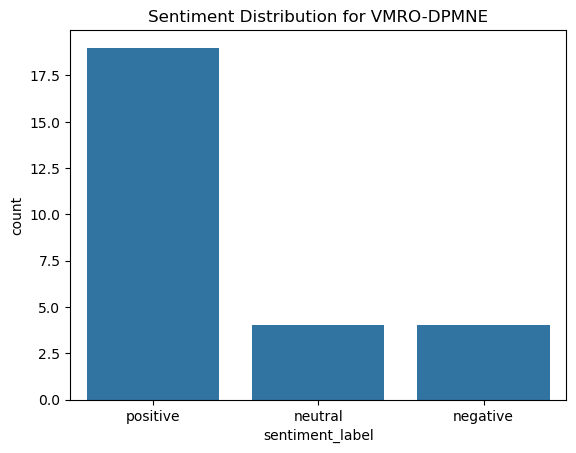

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sentiment_combined.csv")

sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution for VMRO-DPMNE")
plt.show()



